# Seminar 2

Download `train.csv` file from https://www.kaggle.com/c/titanic/data?select=train.csv

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_csv('train.csv')
df.sample(4)

Columns:

*  **PassengerId** - The ID of the passenger
*   **Survived** - 	Survival of the passenger;	0 = No, 1 = Yes
* **Pclass**	- Ticket class;	1 = 1st, 2 = 2nd, 3 = 3rd
* **Sex**	- Sex of the passenger
*   **Age** -	Age in years
*   **SibSp**	- Number of siblings / spouses aboard the Titanic
* **Parch**	- Number of parents / children aboard the Titanic
* **Ticket**	- Ticket number
* **Fare**	- Passenger fare
* **Cabin**	- Cabin number
* **Embarked**	- Port of Embarkation;	C = Cherbourg, Q = Queenstown, S = Southampton

#Variables' types

There are numerical and cetegorical (nominal, ordinal) variables.

We need to know the type of every variable to work with it.

Let's check the types of columns in `df` and the description of the columns and try to understand the type of every feature of passengers.

In [ ]:
#Types of columns
df.dtypes

# Add/delete columns

We often need to create new features based on old ones or delete the extr ones.

In [ ]:
df['Random'] = np.random.rand(len(df))
df.sample(2)

There was no `'Random'` column, we created it (like in python `dict`, just entered a new key)

We also can use old columns to create new

In [ ]:
df['Fare'] * 2

In [ ]:
df['Double_Fare'] =  df['Fare'] * 2
df.sample(2)

In [ ]:
df['Fare_Random'] =  df['Fare'] + df['Random']
df.sample(2)

In [ ]:
df['Big_Fare'] =  (df['Fare'] > 100).astype('int64')
df.sample(2)

All the new columns were created using math or bool operations. What if we have some more complex function?

For example, we want to have column 'name_length'

In [ ]:
len(df['Name'])

The code does not compute `len` for every name, but to the Series itself.

To apply function we can use `apply` (or `for`-loop, but they are slow)

In [ ]:
df['Name'].apply(len)

**Task:**

Every full name contains a title (Mr, Mrs, ...), let's extract it and put into new column.

In [ ]:
def extract_title(s):
  #YOUR CODE


df['Title'] = df['Name'].apply(extract_title)

df.sample(5)

To delete column/rows we can use `drop` function

In [ ]:
df.drop(columns=['Big_Fare', 'Fare_Random', 'Double_Fare', 'Random'])

In [ ]:
df.sample(3)

But the columns are still there ...

Important: many functions which change the dataframe are not inplace, they return a **copy**

In [ ]:
new_df = df.drop(columns=['Big_Fare', 'Fare_Random', 'Double_Fare', 'Random'])
#change something in new_df
new_df['Age'] = 0
new_df['Parch'] = -12321
new_df.head(2)

In [ ]:
#initial is untouched
df.head(2)

We need to save the changes (use `inplace=True` or `df = df.drop(...)`)

In [ ]:
#df = df.drop(columns=['Big_Fare', 'Fare_Random', 'Double_Fare', 'Random'])
df.drop(columns=['Big_Fare', 'Fare_Random', 'Double_Fare', 'Random'], inplace=True)
df.sample(2)

# Frequencies

In [ ]:
np.random.seed(0)
sample_int = np.random.randint(10, size=100)

Frequency distribution for the observations in numpy array:

In [ ]:
np.unique(sample_int, return_counts=True)

In [ ]:
#cann create a DataFrame

freq = pd.DataFrame()
freq[['X', 'F']] = np.array(np.unique(sample_int, return_counts=True)).T
freq

Frequency distribution for column Age:

In [ ]:
df['Age'].value_counts().sort_index()

Proportion:

In [ ]:
freq['p'] = freq['F'] / freq['F'].sum()
freq

In [ ]:
df['Age'].value_counts(normalize=True).sort_index()

Percentage:

In [ ]:
freq['%'] = freq['p'] * 100
freq

In [ ]:
df['Age'].value_counts(normalize=True).sort_index() * 100

We can compute histograms using numpy:

In [ ]:
hist, bin_edges = np.histogram(df['Age'].dropna(), bins=10)

bin_edges

In [ ]:
#Each bin has the same width (computed automatically)
bin_edges[1:] - bin_edges[:-1]

In [ ]:
#Number of observations for each bin
hist

Let's plot the histogram using seaborn, library for visualization, extension of matplotlib

Why use seaborn:



*   Simplier syntax
*   Faster and easier to make beautiful plots (the default versions are alredy ok)
*   Convenient for pandas
*   More complex plots



In [ ]:
import seaborn as sns

In [ ]:
#The histogram
sns.histplot(data=df, x='Age', bins=10)

If we want to make similar plot in matplotlib:

In [ ]:
plt.hist(df['Age'], bins=10)

Seaborn seems more beautiful, and it is easier to draw several histograms divided by some feature as color.

We can draw probabilities:

In [ ]:
#stat='probability' or 'proportion' - normalize such that bar heights sum to 1
sns.histplot(data=df, x='Age', bins=10, stat='probability')

Let's draw polygons:

In [ ]:
sns.histplot(df, x='Age', element='poly')

We sometimes need to check the distribution of a variable divided by some other variable.

For example, we depicted the distribution of ages for the whole Titanic. Is the distribution differnet for every class? Maybe older people are wealthier and can afford better class.

In [ ]:
#hue - divide by a feature and depict in diffent color
sns.histplot(data=df, x='Age', bins=10, hue='Pclass')

What can you say about the plot?

In [ ]:
sns.histplot(data=df, x='Age', bins=10, hue='Pclass', stat='proportion', common_norm=False)

We can also draw histogram for `Pclass` variable, but it may not look baeutiful

In [ ]:
sns.histplot(df, x='Pclass')

Better to draw bar plot (bacause Pclass has only 3 separate values). If we eant to count and depict, we may use `countplot`

In [ ]:
sns.countplot(df, x='Pclass')

We can draw `countplot` not for numereic value

In [ ]:
sns.countplot(df, x='Embarked')

# Statistics

##Measures of Central Tendency

Measures of Central Tendency:



*   Mean (Arithmetic)
*   Median
*   Mode



### Mean `.mean()`

$$
\bar {x} =  \frac {1}{n} \sum _{i=1}^{n}x_{i}
$$

In [ ]:
df['Age'].mean(), df['Fare'].mean()

Problem with mean value: outliers (data points that are significantly different)

In [ ]:
#Example:

#Sample 99 times 0 and 1 time 1000
sample = np.ones(100)
sample[0] = 1000

np.mean(sample)

### Median `.median()`

Median is the middle score for a set of data that has been arranged in order of magnitude

Example for even number of observations:

Sample: 1 5 3 6

Sort values: 1 3 5 6

The median will be (3 + 5) / 2 = 4





Example for odd number of observations:

Sample: 1 5 3 6 2

Sort values: 1 2 3 5 6

The median will be 3 (the middle value)

In [ ]:
df['Age'].median(), df['Fare'].median()

Let's check outliers:

In [ ]:
np.median(sample)

### Mode `.mode`

Mode is the most frequent score in our data set (not only for numeric, can be several values)

In [ ]:
df['Fare'].mode()

In [ ]:
df['Age'].mode()

In [ ]:
df['Cabin'].mode()

In [ ]:
df['Embarked'].mode()

Example with outliers:

In [ ]:
#No mode function in numpy
#Let's choose 1 mode
def mode(sample):
  values, counts = np.unique(sample, return_counts=True)
  return values[counts.argmax()]
mode(sample)

Comparing mean and median helps to detect skewed distribution:

In [ ]:
df['Age'].mean(), df['Age'].median()

For Age mean and median seem to be close

In [ ]:
#Histogram of Age
plt.hist(df['Age'], bins=20)

#Dashed lines near mean and median
plt.axvline(df['Age'].mean(), linestyle='--', c='black', label='mean')
plt.axvline(df['Age'].median(), linestyle='--', c='red', label='median')
plt.axvline(df['Age'].mode()[0], linestyle='--', c='yellow', label='mode')

plt.legend(loc='upper right')
plt.show()

In [ ]:
df['Fare'].mean(), df['Fare'].median()

In [ ]:
#Histogram of Fare
plt.hist(df['Fare'], bins=20)

#Dashed lines near mean and median
plt.axvline(df['Fare'].mean(), linestyle='--', c='black', label='mean')
plt.axvline(df['Fare'].median(), linestyle='--', c='red', label='median')
plt.axvline(df['Fare'].mode()[0], linestyle='--', c='yellow', label='mode')

plt.legend(loc='upper right')
plt.show()

In [ ]:
new_sample = np.array([1, 2, 3, 4, 100])

plt.hist(new_sample, bins=20)

#Dashed lines near mean and median
plt.axvline(np.mean(new_sample), linestyle='--', c='black', label='mean')
plt.axvline(np.median(new_sample), linestyle='--', c='red', label='median')
plt.axvline(mode(new_sample), linestyle='--', c='yellow', label='mode')

plt.legend(loc='upper right')
plt.show()

## Dividing into groups

In [ ]:
df.describe()

We often need to calculate statistics for particular groups in data.

For example, we know the mean, median and mode values for `Fare`. However, most likely people in class 1 paid on average more than people in class 3. We may want to check it


Firstly, let's check if there are really only 3 classes:

In [ ]:
df['Pclass'].unique()

In [ ]:
df['Pclass'].nunique()

In [ ]:
#Count how many passengers were in every class
df['Pclass'].value_counts()

If we want to separately check the mean value for passengers divided by class, we can use `groupby`.

`groupby`  method collect rows with same value of the given column (`'Pclass'`) and then compute the given function (`mean`) for every same value.

In [ ]:
df.groupby('Pclass')['Fare'].mean()

We can also group by several columns and comtute other statistics.

For example, let's check the median value for people in different classes, which embarked in different ports:

In [ ]:
df.groupby(['Pclass', 'Embarked'])['Fare'].median()

**Task:**

What was the maximum age of male/female passengers?

In [ ]:
#YOUR CODE

##Measures of spread

Measures of spread:

* Range
* Interquartile range
* Variance
* Standard deviation

### Range

Range is the difference between the largest and smallest values

In [ ]:
df['Age'].max() - df['Age'].min(), df['Fare'].max() - df['Fare'].min()

In [ ]:
#Histogram of Age
plt.hist(df['Age'], bins=20)

#Dashed lines near min and max
plt.axvline(df['Age'].min(), linestyle='--', c='black')
plt.axvline(df['Age'].max(), linestyle='--', c='black')

plt.plot([df['Age'].min(), df['Age'].max()], [80, 80], c='red', label='Range')

plt.legend(loc='upper right')
plt.show()

In [ ]:
sample.max() - sample.min()

### Interquartile range

Quartiles are values which divide the number of data points into four parts(quarters), of more-or-less equal size:




*   The first quartile (Q1) - lowest 25% data is below this point. It is also known as the lower quartile.
*   The second quartile (Q2) is the median of a data set; thus 50% of the data lies below this point.
* The third quartile (Q3) - lowest 75% data is below this point. It is known as the upper quartile, as 75% of the data lies below this point.






In [ ]:
df['Age'].quantile(0.25) #q1

In [ ]:
df['Age'].quantile(0.5) #q2

In [ ]:
df['Age'].quantile(0.75) #q3

In [ ]:
#Histogram of Age
plt.hist(df['Age'], bins=20)

#Dashed lines Q1, Q2, Q3
plt.axvline(df['Age'].quantile(0.25), linestyle='--', c='blue',   label='Q1')
plt.axvline(df['Age'].quantile(0.50), linestyle='--', c='red',    label='Q2 (median)')
plt.axvline(df['Age'].quantile(0.75), linestyle='--', c='orange', label='Q3')


plt.legend(loc='upper right')
plt.show()

In [ ]:
np.quantile(sample, 0.25), np.quantile(sample, 0.5), np.quantile(sample, 0.75)

Interquartile range -  difference between the third and fist quartile of the data.

IQR = Q3 - Q1

In [ ]:
df['Age'].quantile(0.75)-df['Age'].quantile(0.25)

In [ ]:
#Histogram of Age
plt.hist(df['Age'], bins=20)

#Dashed lines Q1, Q2, Q3
plt.axvline(df['Age'].quantile(0.25), linestyle='--', c='blue',   label='Q1')
plt.axvline(df['Age'].quantile(0.50), linestyle='--', c='red',    label='Q2 (median)')
plt.axvline(df['Age'].quantile(0.75), linestyle='--', c='orange', label='Q3')


plt.plot([df['Age'].quantile(0.25), df['Age'].quantile(0.75)], [80, 80], c='black', label='IQR')

plt.legend(loc='upper right')
plt.show()

In [ ]:
np.quantile(sample, 0.75) - np.quantile(sample, 0.25)

### Variance `.var()`

Variance is the expected value of the squared variation of a random variable from its mean value



Variance for population differ from variance for sample:

Eample:

data  - 1 2 5 3 3 1

The mean value = 2.5

The sum of squared deviations = (2.25 + 0.25 + 6.25 + 0.25 + 0.25 + 2.25) = 11.5

If the data is the population, var = 11.5 / 6 = 1.92

If the data is a sample, var = 11.5 / (6-1) = 2.3

In [ ]:
#population
df['Age'].var(ddof=0)

In [ ]:
#sample
df['Age'].var(ddof=1)

In [ ]:
#the default is for sample (ddof=1)
df['Age'].var()

In [ ]:
#in numpy ddof=0 by default
sample.var(), sample.var(ddof=1)

### Standard deviation `.std()`

Standard deviation is the square root of variance.

In [ ]:
#population
df['Age'].std(ddof=0)

In [ ]:
#sample
df['Age'].std(ddof=1)

In [ ]:
sample.std(), sample.std(ddof=1)

Standard deviation is more useful to describe the variability because it is expressed in the same units as the data. Variance is often used in mathematics.

**Task:**

What was the standard deviation of age of male/female passengers?

In [ ]:
#YOUR CODE

# Outliers

Outlier is a data point that stands out a lot from the other data points in a set.

Possible causes:
*   Variability of data
*   Novel data
*   Errors

Examples:

* The average height of a giraffe is $\sim16$ feet tall. There are 2 giraffes that are 9 and 8.5 feet tall.
* T-shirts usually cost from 10 \\$ to 1 000 \\$, one T-shirt costs 1 000 000 \\$ because it is a luxury item created by a famous designer.
* The age of a student is 1020 years. They made a mistake while filling the year of birth in the form:  typed 1004 instead of 2004.



In [ ]:
#on histogram we have 1 tall bar and 1 really short one
plt.hist(sample)
plt.show()

There are 2 ways to spot outliers:


*   1.5IQR
*   std; 2std; 3std



## 1.5IQR

Outliers are points below $Q1-1.5IQR$ and above $Q3+1.5IQR$

Here a boxplot may be useful:
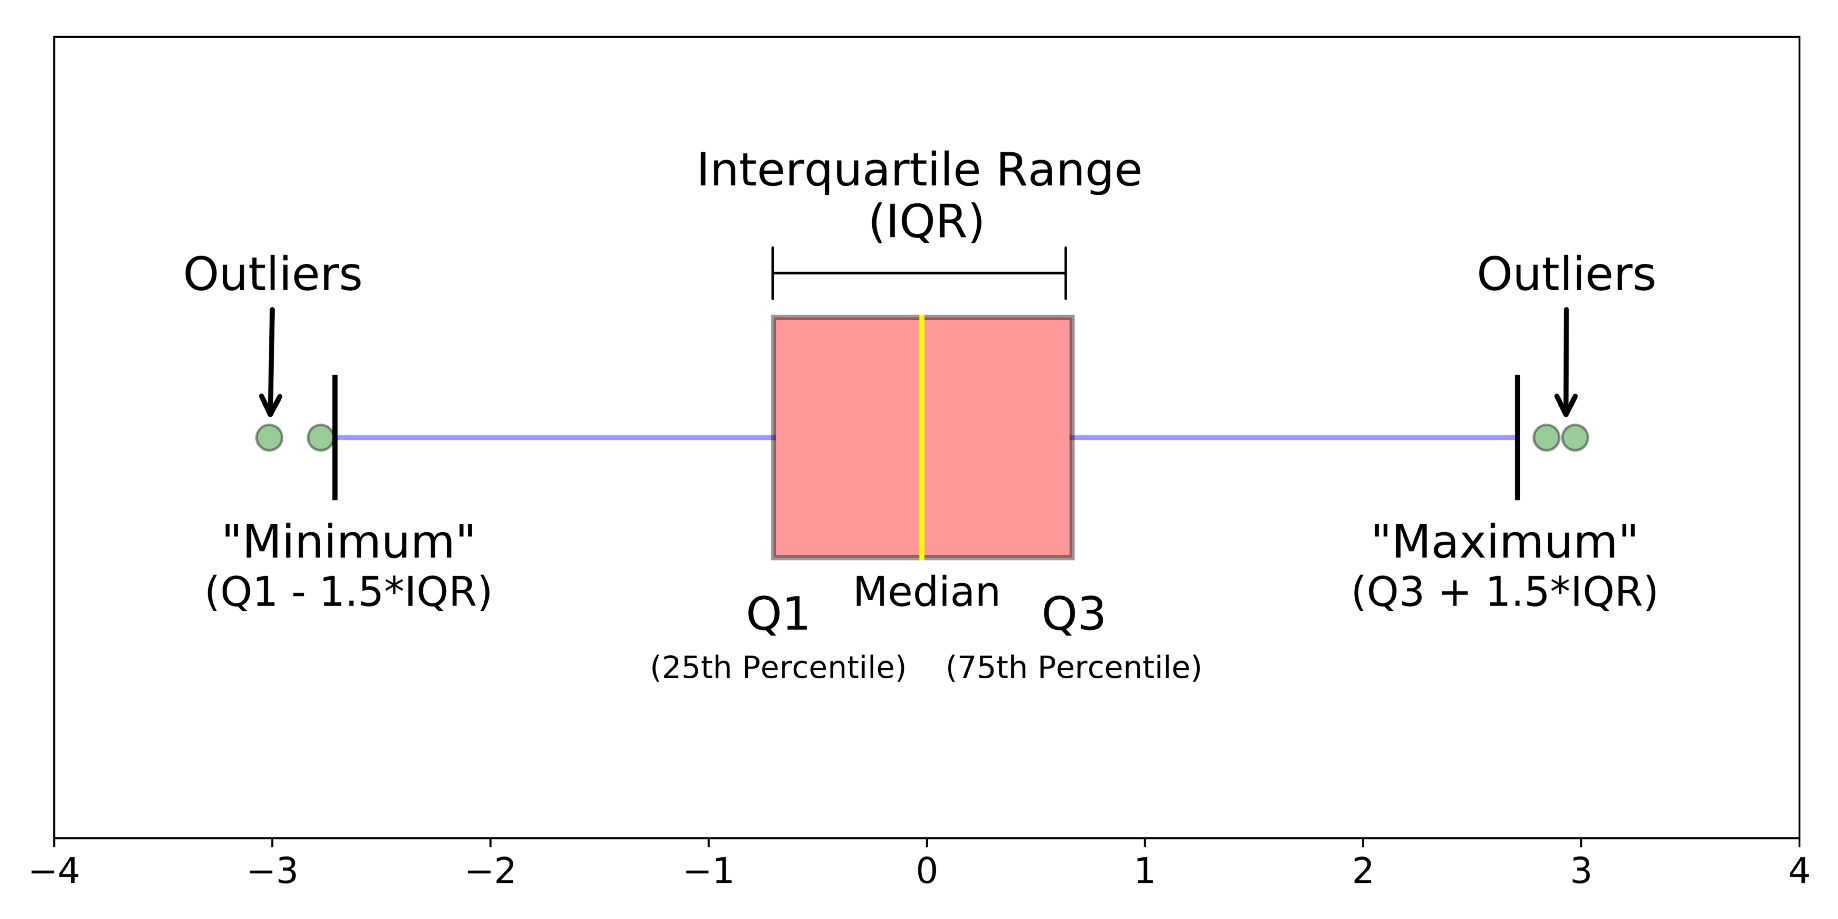

In [ ]:
plt.boxplot(df['Age'].dropna(), vert=False)
plt.show()

In [ ]:
sns.boxplot(df, x='Age')

In [ ]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1

low_iqr = q1 - iqr * 1.5
up_iqr = q3 + iqr * 1.5

low_iqr, up_iqr

**Task:**

Filter the objects, that are outliers

In [ ]:
#your code here

## std; 2std; 3std

If we have a normal distribution with  $μ=0$  and variance  $σ^2$ and we will generate observetions from it:

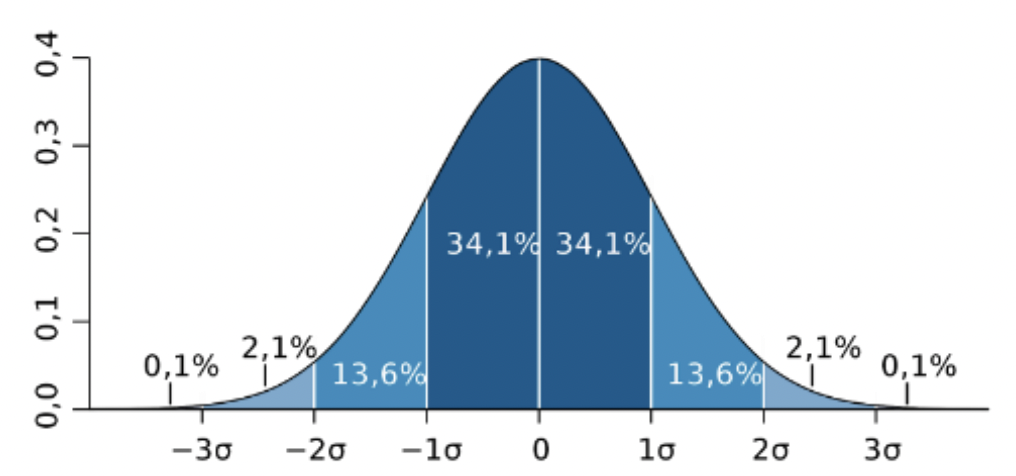

So, if the distribution is normal:



*   We consider 1std: NOT outliers are 68.2\% of data near center ($\mu$)
*   We consider 2std: NOT outliers are 95.5\% of data near center ($\mu$)
*   We consider 3std: NOT outliers are 99.7\% of data near center ($\mu$)



In [ ]:
mu = df['Age'].mean()
mu

In [ ]:
std = df['Age'].std()
std

In [ ]:
low_1s = mu - 1 * std
up_1s = mu + 1 * std

low_2s = mu - 2 * std
up_2s = mu + 2 * std

low_3s = mu - 3 * std
up_3s = mu + 3 * std

low_2s, up_2s

In [ ]:
#Histogram of Age
plt.hist(df['Age'], bins=20)

#
plt.axvline(low_2s, linestyle='--', c='blue',   label='low')
plt.axvline(up_2s,  linestyle='--', c='red',    label='up')


plt.legend(loc='upper right')
plt.show()

**Task:**

Filter the objects, that are outliers

In [ ]:
#your code here

## Comparison

In [ ]:
#Histogram of Age
plt.hist(df['Age'], bins=20)


plt.axvline(low_1s, linestyle='--', c='red',   label='1std')
plt.axvline(up_1s,  linestyle='--', c='red',   label='1std')


plt.axvline(low_2s, linestyle='--', c='orange',   label='2std')
plt.axvline(up_2s,  linestyle='--', c='orange',   label='2std')

plt.axvline(low_3s, linestyle='--', c='green',   label='3std')
plt.axvline(up_3s,  linestyle='--', c='green',   label='3std')


plt.axvline(low_iqr, linestyle='--', c='black',   label='1.5IQR')
plt.axvline(up_iqr,  linestyle='--', c='black',   label='1.5IQR')


plt.legend(loc='upper right')
plt.show()

# Missing values

We can check, which columns have missing values (`NaN`)

In [ ]:
df.isna().sum()

Sorted for easier work:

In [ ]:
df.isna().sum().sort_values(ascending=False)

Why missing data is a problem?

*   Reduce sample size
*   Introduce bias
*   Impossible to apply machine learning texhniques

Why data may be missing?

*   Errors
*   Non-response (privacy concerns, conditional missingness)
*   Nature of the variable

Examples:

*   Technical issues
*   Questions in the form: "Your patronymic", "Your middle name", follow-up questions like "If you answered 'yes' in the previous question, write down your e-mail"
*   Variable PREVIOUS_CARD_NUM_UTILIZED: the number ofalready recycled cards (if empty - 0)"







Possible ways to tackle:


*   Fill the missing values - the usual approach
*   Delete the feature if there are a lot of (usually $> 40\%$) missing values. (Need to be cautious, need to check the nature of the missing data, may limit ourselves)
*   Delete the samples with missing values (if there is a lot of data)




In [ ]:
df.isna().mean().sort_values(ascending=False)

`Cabin` seems to be missing 77\% data. We need to investigate, why. Maybe, there were no cabins in particular class? Or the cabins were not assigned and it is unknown who chose which?

Let's drop this column for now.

In [ ]:
df.drop('Cabin', axis=1, inplace=True)

Let's work with `Embarked` and `Age`. There are not many missing values, let's fill them.


What can we use:


*   Measures of Central Tendency for the whole sample
*   Measures of Central Tendency for the group
*   Random element



For `Age` we can use mean, median or mode. Let's use median.

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

`Embarked` is not numaric, so we can use only mode

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

Let's check if there are any missing values now

In [ ]:
df.isna().sum().sort_values(ascending=False)

When we investigated the measures of central tendency for `Age` we ignored `NaN` values.

It is better to fill missing values afterwards, because we may get some strange results. Let's look into the histogram of `Age` again.

What is going on?

In [ ]:
sns.histplot(df, x='Age')